In [1]:
#Import basic packages
import pandas as pd
import numpy as np

#Import vizualization packages
import matplotlib.pyplot as plt
import seaborn as sns

#Import linear model packages
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression

#Import decision tree packages
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

In [2]:
df = pd.read_csv('ps_subs_table.csv')

In [3]:
df.shape

(2000, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ps_plus_sub  2000 non-null   int64  
 1   ps_now_sub   2000 non-null   int64  
 2   pay_amt      2000 non-null   float64
 3   pay_cycle    2000 non-null   int64  
 4   system       2000 non-null   int64  
dtypes: float64(1), int64(4)
memory usage: 78.2 KB


In [5]:
df.head()

,ps_plus_sub,ps_now_sub,pay_amt,pay_cycle,system
0,1,0,49.99,0,0
1,0,1,59.99,0,0
2,0,0,0.00,1,0
3,1,1,109.98,0,1
4,0,0,0.00,1,0


In [6]:
df.describe()

,ps_plus_sub,ps_now_sub,pay_amt,pay_cycle,system
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.509500,0.508500,55.974820,0.373500,0.505500
std,0.500035,0.500053,48.159614,0.483854,0.500095
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,59.990000,0.000000,1.000000
75%,1.000000,1.000000,109.980000,1.000000,1.000000
max,1.000000,1.000000,109.980000,1.000000,1.000000


In [7]:
df.isnull().sum()

ps_plus_sub    0
ps_now_sub     0
pay_amt        0
pay_cycle      0
system         0
dtype: int64

## DATA CLEANING

<AxesSubplot:>

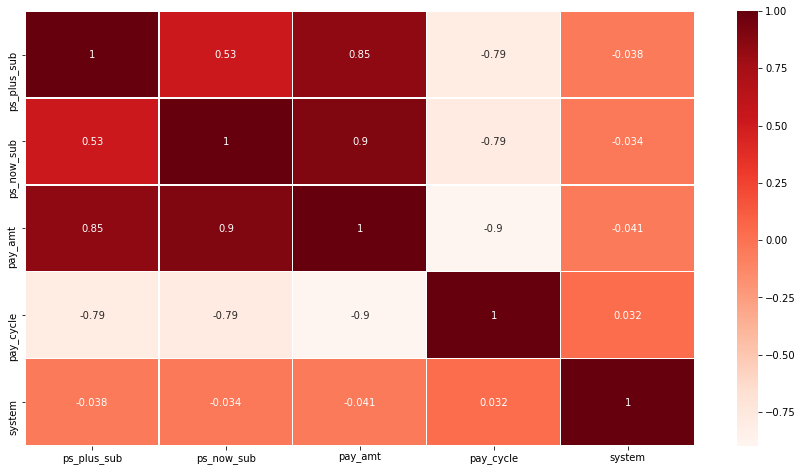

In [8]:
#Checking for multicollinearity
plt.figure(figsize = (15,8))
sns.heatmap(df.corr(), annot = True, linewidths = 0.1, cmap = 'Reds')

In [9]:
#Dropping columns with high multicollinearity

df = df.drop(['pay_amt'], axis = 1)

## MODEL 1 PLAYSTATION NOW SUBSCRIPTIONS

In [10]:
#Selecting dependent and independent variables

x1 = df.drop(['ps_now_sub'],axis = 1)
y1 = df.ps_now_sub

In [11]:
#Splitting data into training and testing

x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size = 0.3, random_state = 101)

In [12]:
#Creating our logistic regression model

log_reg1 = linear_model.LogisticRegression(C = 1e40, solver = 'newton-cg')

In [13]:
#Fitting the model with the data

fitted_model = log_reg1.fit(x1_train, y1_train)

In [14]:
#Predicting the accuracy of the model

y1_pred = log_reg1.predict(x1_test)
print("Logistic regression model 1 accuracy is", round(accuracy_score(y1_test.values.flatten(),y1_pred),2))

Logistic regression model 1 accuracy is 0.88


In [15]:
#Creating a variable to store the Logistic regression function

lr1 = LogisticRegression()
lr1.fit(x1_train, y1_train)

LogisticRegression()

In [16]:
#Higher value of coefficients will imply larger influence of the corresponding features on the outcome

features = np.std(x1_train,0)*lr1.coef_[0]
features.sort_values(ascending=False)

system        -0.117877
ps_plus_sub   -0.825957
pay_cycle     -3.429149
dtype: float64

In [17]:
print(classification_report(y1_test, y1_pred))

              precision    recall  f1-score   support

           0       1.00      0.77      0.87       319
           1       0.79      1.00      0.88       281

    accuracy                           0.88       600
   macro avg       0.90      0.88      0.88       600
weighted avg       0.90      0.88      0.88       600



Text(0.5, 1.0, 'ROC Curve')

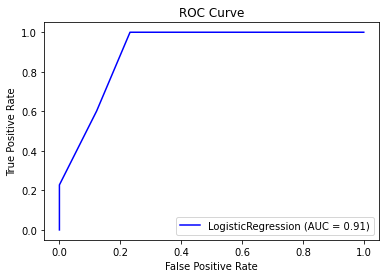

In [18]:
#Graphing the ROC curve

plot_roc_curve(log_reg1, x1_test, y1_test, color = "blue")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")

## MODEL 2 PLAYSTATION PLUS SUBSCRIPTIONS

In [19]:
#Selecting dependent and independent variables

x2 = df.drop(['ps_plus_sub'],axis = 1)
y2 = df.ps_plus_sub

In [20]:
#Splitting data into training and testing

x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size = 0.3, random_state = 101)

In [21]:
#Adding a penalty as a punishment for large number of variables

log_reg2 = linear_model.LogisticRegression(C = 1e40, solver = 'newton-cg') 

In [22]:
#Fitting the model with the data

fitted_model2 = log_reg2.fit(x2_train,y2_train)

In [23]:
y2_pred = log_reg2.predict(x2_test)
print("Logistic regression model 2 accuracy is", round(fitted_model2.score(x2_test,y2_test),10))

Logistic regression model 2 accuracy is 0.8933333333


In [24]:
#Creating a variable to store the Logistic regression function

lr2 = LogisticRegression()
lr2.fit(x2_train, y2_train)

LogisticRegression()

In [25]:
#Higher value of coefficients will imply larger influence of the corresponding features on the outcome

features = np.std(x2_train,0)*lr2.coef_[0]
features.sort_values(ascending=False)

system       -0.082523
ps_now_sub   -0.826903
pay_cycle    -3.409210
dtype: float64

In [26]:
print(classification_report(y2_test, y2_pred))

              precision    recall  f1-score   support

           0       1.00      0.79      0.88       309
           1       0.82      1.00      0.90       291

    accuracy                           0.89       600
   macro avg       0.91      0.90      0.89       600
weighted avg       0.91      0.89      0.89       600



Text(0.5, 1.0, 'ROC Curve')

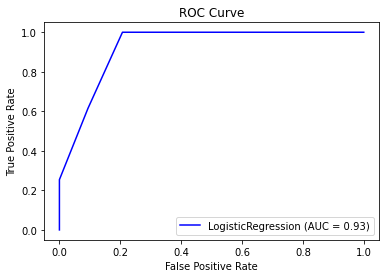

In [27]:
#Graphing the ROC curve

plot_roc_curve(log_reg2, x2_test, y2_test, color = "blue")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")